In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Base.csv")
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [4]:
df.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,...,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,...,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [10]:
df.isna().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

In [3]:
# Convertir variables categóricas a tipo 'category'
df['payment_type'] = df.payment_type.astype('category')
df['employment_status'] = df.employment_status.astype('category')
df['housing_status'] = df.housing_status.astype('category')
df['source'] = df.source.astype('category')
df['device_os'] = df.device_os.astype('category')

In [5]:
# Aplicar One-Hot Encoding
df = pd.get_dummies(df, drop_first=True)

In [18]:
correlation_matrix = df.corr()

In [20]:
# Establecer un umbral para visualizar correlaciones significativas
threshold = 0.6
high_correlation = correlation_matrix[abs(correlation_matrix) > threshold]

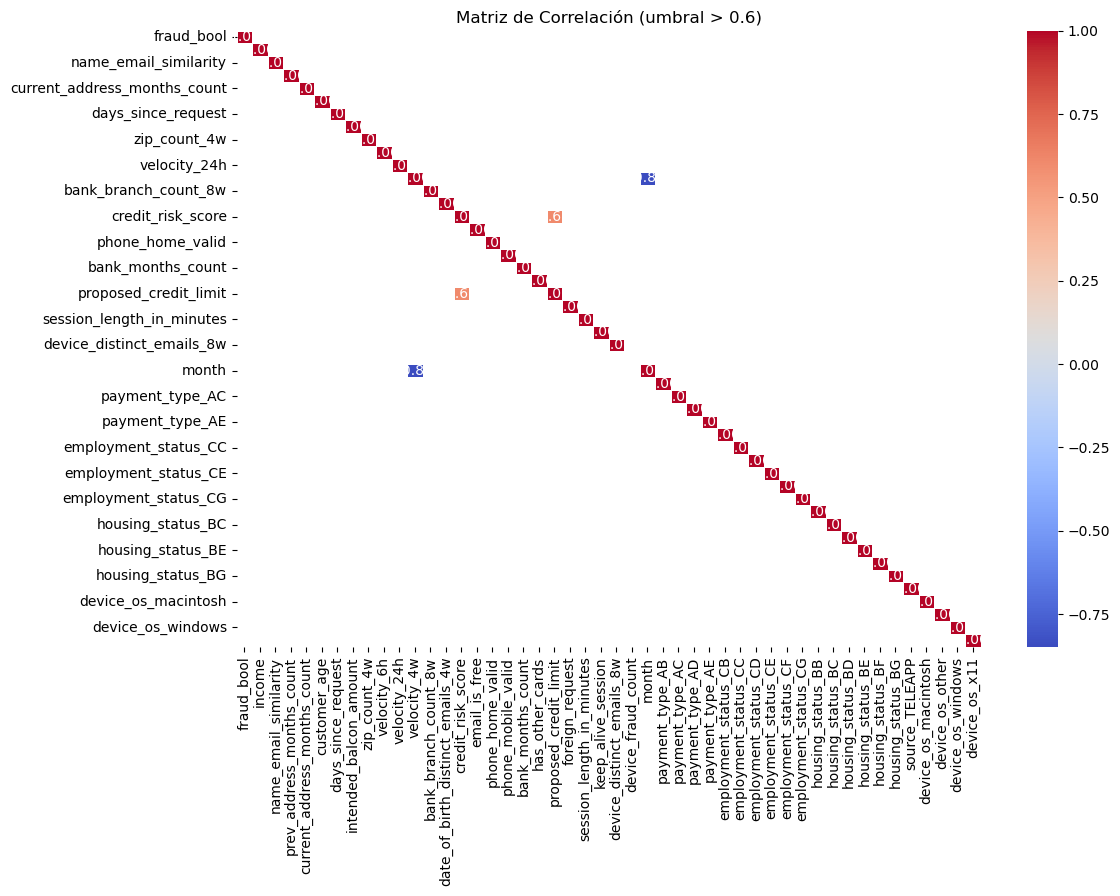

In [22]:
# Visualizar la matriz de correlación filtrada
plt.figure(figsize=(12, 8))
sns.heatmap(high_correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title(f'Matriz de Correlación (umbral > {threshold})')
plt.show()

In [24]:
# Calcular correlaciones
correlaciones = df.corr(numeric_only=True)['fraud_bool'].drop('fraud_bool')
correlaciones_ordenadas = correlaciones.reindex(correlaciones.abs().sort_values(ascending=False).index)

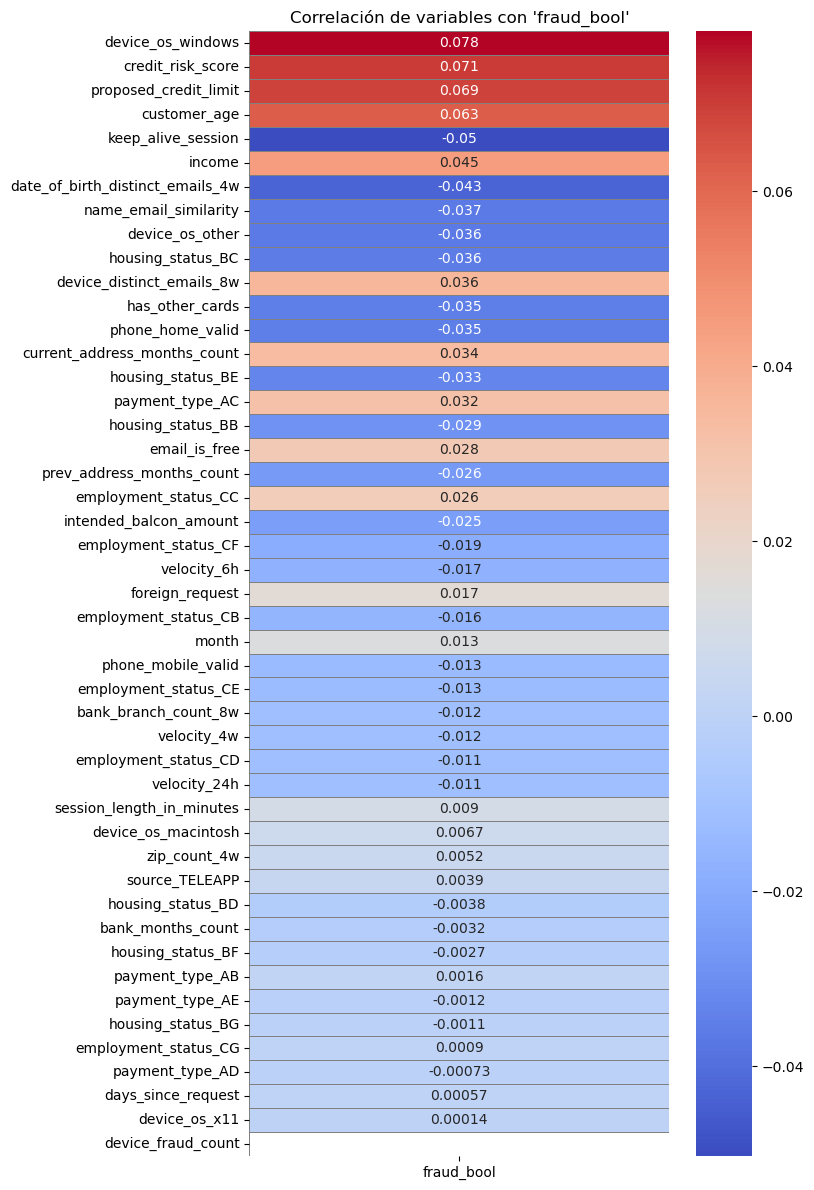

In [26]:
# Plot ordenado
plt.figure(figsize=(8, 12))
sns.heatmap(correlaciones_ordenadas.to_frame(), annot=True, cmap="coolwarm", linewidths=0.5, linecolor='gray')
plt.title("Correlación de variables con 'fraud_bool'")
plt.tight_layout()
plt.show()

In [7]:
# Separar variables predictoras (X) y variable objetivo (y)
X = df.drop(['fraud_bool'], axis=1)
y = df['fraud_bool']

In [9]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [11]:
# Verificar las formas de los conjuntos
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(700000, 47) (300000, 47) (700000,) (300000,)


In [13]:
# Aplicar BorderlineSMOTE
smote = BorderlineSMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [15]:
# Escalar los datos (opcional pero recomendado)
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Entrenar un modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [21]:
# Hacer predicciones y evaluar
y_pred_rf = rf.predict(X_test)
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_rf))

Matriz de Confusión:
[[296312    379]
 [  3188    121]]


In [23]:
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf))


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    296691
           1       0.24      0.04      0.06      3309

    accuracy                           0.99    300000
   macro avg       0.62      0.52      0.53    300000
weighted avg       0.98      0.99      0.98    300000



In [25]:
feature_importance = pd.DataFrame({'Variable': X.columns, 'Importancia': rf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importancia', ascending=False)

In [27]:
# Mostrar las 10 variables más y menos importantes
print("\nTop 10 Variables más importantes:")
print(feature_importance.head(10))

print("\nTop 10 Variables menos importantes:")
print(feature_importance.tail(10))


Top 10 Variables más importantes:
                        Variable  Importancia
45             device_os_windows     0.147625
19         proposed_credit_limit     0.094155
22            keep_alive_session     0.084242
4                   customer_age     0.076044
13             credit_risk_score     0.064925
15              phone_home_valid     0.061793
27               payment_type_AC     0.051882
18               has_other_cards     0.042898
3   current_address_months_count     0.040229
0                         income     0.035384

Top 10 Variables menos importantes:
                Variable  Importancia
46         device_os_x11     0.000676
20       foreign_request     0.000659
42        source_TELEAPP     0.000640
32  employment_status_CD     0.000437
33  employment_status_CE     0.000301
40     housing_status_BF     0.000193
35  employment_status_CG     0.000027
29       payment_type_AE     0.000002
41     housing_status_BG     0.000001
24    device_fraud_count     0.000000
